<a href="https://colab.research.google.com/github/syedtoubur/Finding_oriC/blob/main/OriC_prediction_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Finding Repeated k mers and matching with consensus

In [ ]:
#File uploading

with open('Vibrio_cholerae_genome.txt','r') as file:
  content=file.read()

In [ ]:
content

'ACAATGAGGTCACTATGTTCGAGCTCTTCAAACCGGCTGCGCATACGCAGCGGCTGCCATCCGATAAGGTGGACAGCGTCTATTCACGCCTTCGTTGGCAACTTTTCATCGGTATTTTTGTTGGCTATGCAGGCTACTATTTGGTTCGTAAGAACTTTAGCTTGGCAATGCCTTACCTGATTGAACAAGGCTTTAGTCGTGGCGATCTGGGTGTGGCTCTCGGTGCGGTTTCAATCGCGTATGGTCTGTCTAAATTTTTGATGGGGAACGTCTCTGACCGTTCTAACCCGCGCTACTTTCTGAGTGCAGGTCTACTCCTTTCGGCACTAGTGATGTTCTGCTTCGGCTTTATGCCATGGGCAACGGGCAGCATTACTGCGATGTTTATTCTGCTGTTCTTAAACGGCTGGTTCCAAGGCATGGGTTGGCCTGCTTGTGGCCGTACTATGGTGCACTGGTGGTCACGCAAAGAGCGTGGTGAGATTGTTTCGGTCTGGAACGTCGCTCACAACGTCGGTGGTGGTTTGATTGGCCCCATTTTCCTGCTCGGCCTATGGATGTTTAACGATGATTGGCGCACGGCCTTCTATGTCCCCGCTTTCTTTGCGGTGCTGGTTGCCGTATTTACTTGGCTAGTCATGCGCGATACTCCTCAATCTTGTGGTTTACCACCGATTGAAGAGTACAAAAACGACTATCCCGATGATTACGATAAGTCGCATGAAAATGAGATGACTGCGAAAGAGATCTTCTTTAAGTATGTCTTCAACAACAAACTGCTTTGGTCGATTGCGATTGCTAACGCCTTCGTTTACCTGATCCGCTACGGTGTACTTGACTGGGCTCCGGTTTACCTCAAAGAAGCCAAACACTTCACGGTTGATAAATCTTCTTGGGCTTACTTCCTGTACGAGTGGGCGGGCATTCCGGGTACTTTGTTGTGTGGTTGGATTTCCGACAAAGTGTTTAAAGGCCGCCGCGCTCCAGCAGGCATCCTGT

In [ ]:
seq_list=content.replace('\n','')

In [ ]:
seq_list

'ACAATGAGGTCACTATGTTCGAGCTCTTCAAACCGGCTGCGCATACGCAGCGGCTGCCATCCGATAAGGTGGACAGCGTCTATTCACGCCTTCGTTGGCAACTTTTCATCGGTATTTTTGTTGGCTATGCAGGCTACTATTTGGTTCGTAAGAACTTTAGCTTGGCAATGCCTTACCTGATTGAACAAGGCTTTAGTCGTGGCGATCTGGGTGTGGCTCTCGGTGCGGTTTCAATCGCGTATGGTCTGTCTAAATTTTTGATGGGGAACGTCTCTGACCGTTCTAACCCGCGCTACTTTCTGAGTGCAGGTCTACTCCTTTCGGCACTAGTGATGTTCTGCTTCGGCTTTATGCCATGGGCAACGGGCAGCATTACTGCGATGTTTATTCTGCTGTTCTTAAACGGCTGGTTCCAAGGCATGGGTTGGCCTGCTTGTGGCCGTACTATGGTGCACTGGTGGTCACGCAAAGAGCGTGGTGAGATTGTTTCGGTCTGGAACGTCGCTCACAACGTCGGTGGTGGTTTGATTGGCCCCATTTTCCTGCTCGGCCTATGGATGTTTAACGATGATTGGCGCACGGCCTTCTATGTCCCCGCTTTCTTTGCGGTGCTGGTTGCCGTATTTACTTGGCTAGTCATGCGCGATACTCCTCAATCTTGTGGTTTACCACCGATTGAAGAGTACAAAAACGACTATCCCGATGATTACGATAAGTCGCATGAAAATGAGATGACTGCGAAAGAGATCTTCTTTAAGTATGTCTTCAACAACAAACTGCTTTGGTCGATTGCGATTGCTAACGCCTTCGTTTACCTGATCCGCTACGGTGTACTTGACTGGGCTCCGGTTTACCTCAAAGAAGCCAAACACTTCACGGTTGATAAATCTTCTTGGGCTTACTTCCTGTACGAGTGGGCGGGCATTCCGGGTACTTTGTTGTGTGGTTGGATTTCCGACAAAGTGTTTAAAGGCCGCCGCGCTCCAGCAGGCATCCTGT

In [ ]:
len(seq_list)

1108250

In [ ]:
seq_list=content

In [ ]:
seq_list[:1000]

'ACAATGAGGTCACTATGTTCGAGCTCTTCAAACCGGCTGCGCATACGCAGCGGCTGCCATCCGATAAGGTGGACAGCGTCTATTCACGCCTTCGTTGGCAACTTTTCATCGGTATTTTTGTTGGCTATGCAGGCTACTATTTGGTTCGTAAGAACTTTAGCTTGGCAATGCCTTACCTGATTGAACAAGGCTTTAGTCGTGGCGATCTGGGTGTGGCTCTCGGTGCGGTTTCAATCGCGTATGGTCTGTCTAAATTTTTGATGGGGAACGTCTCTGACCGTTCTAACCCGCGCTACTTTCTGAGTGCAGGTCTACTCCTTTCGGCACTAGTGATGTTCTGCTTCGGCTTTATGCCATGGGCAACGGGCAGCATTACTGCGATGTTTATTCTGCTGTTCTTAAACGGCTGGTTCCAAGGCATGGGTTGGCCTGCTTGTGGCCGTACTATGGTGCACTGGTGGTCACGCAAAGAGCGTGGTGAGATTGTTTCGGTCTGGAACGTCGCTCACAACGTCGGTGGTGGTTTGATTGGCCCCATTTTCCTGCTCGGCCTATGGATGTTTAACGATGATTGGCGCACGGCCTTCTATGTCCCCGCTTTCTTTGCGGTGCTGGTTGCCGTATTTACTTGGCTAGTCATGCGCGATACTCCTCAATCTTGTGGTTTACCACCGATTGAAGAGTACAAAAACGACTATCCCGATGATTACGATAAGTCGCATGAAAATGAGATGACTGCGAAAGAGATCTTCTTTAAGTATGTCTTCAACAACAAACTGCTTTGGTCGATTGCGATTGCTAACGCCTTCGTTTACCTGATCCGCTACGGTGTACTTGACTGGGCTCCGGTTTACCTCAAAGAAGCCAAACACTTCACGGTTGATAAATCTTCTTGGGCTTACTTCCTGTACGAGTGGGCGGGCATTCCGGGTACTTTGTTGTGTGGTTGGATTTCCGACAAAGTGTTTAAAGGCCGCCGCGCTCCAGCAGGCATCCTGT

In [ ]:
def pattern_occurrence_optimized(text, L, n, t):
    pattern_dictionary = {}
    modified_dictionary = {}
    firstindex = {}

    for i in range(len(text) - n + 1):
        pattern = text[i:i+n]

        if pattern in modified_dictionary:
            continue  # Already found this pattern, no need to check again

        if pattern in pattern_dictionary:
            # Check if current occurrence is far enough from first occurrence
            if i - firstindex[pattern] >= L:
                pattern_dictionary[pattern] = 1  # Reset count
                firstindex[pattern] = i  # Update first index
            else:
                pattern_dictionary[pattern] += 1
                if pattern_dictionary[pattern] == t:
                    modified_dictionary[pattern] = firstindex[pattern]  # Pattern meets requirement
        else:
            pattern_dictionary[pattern] = 1  # First time seeing this pattern
            firstindex[pattern] = i  # Save its first index

    return modified_dictionary


In [ ]:
def rev_complement(string):
  complements={'A':'T','T':'A','G':'C','C':'G'}
  rev_comp=''
  for i in string:
    rev_comp=complements[i]+rev_comp
  return rev_comp

In [ ]:
def hamming_distance(p1, p2):
    return sum(c1 != c2 for c1, c2 in zip(p1, p2))

def pattern_occurrence_with_mismatches(text, L, n, t, d):
    pattern_counts = {}       # Store counts of approximate patterns
    first_indices = {}        # First occurrence of each stored pattern
    result = {}               # Final patterns that satisfy the condition

    for i in range(len(text) - n + 1):
        current_pattern = text[i:i+n]
        rev=rev_complement(current_pattern)

        matched = False

        # Check all patterns we've seen so far
        for stored_pattern in pattern_counts:
            if (hamming_distance(current_pattern, stored_pattern) <= d) or (hamming_distance(rev,stored_pattern) <= d):
                # Check if current occurrence is far enough from first occurrence
                if i - first_indices[stored_pattern][0] >= L:
                    pattern_counts[stored_pattern] = 1
                    first_indices[stored_pattern] = [i]
                else:
                    pattern_counts[stored_pattern] += 1
                    first_indices[stored_pattern].append(i)
                    if pattern_counts[stored_pattern] == t:
                        result[stored_pattern] = first_indices[stored_pattern]
                matched = True
                break

        if not matched:
            # This pattern or anything similar hasn't been seen yet
            pattern_counts[current_pattern] = 1
            first_indices[current_pattern] = [i]

    return result




In [ ]:
mydiction=pattern_occurrence_with_mismatches(seq_list,500,9,6,1)

KeyboardInterrupt: 

In [ ]:
mydiction

{'CGCCGCGCT': 974,
 'GCCGCGCTC': 975,
 'TGGCTACTT': 1189,
 'CGTTTCCCT': 1784,
 'GAAATCAAA': 1844,
 'CAAAGACGA': 1720,
 'GCACCTTGG': 2036,
 'CCGATAAAG': 2463,
 'GCATCAAAC': 2879,
 'ACACCACAT': 3161,
 'CAAACAGCG': 4748,
 'AAACAGCGT': 4749,
 'TGGGACGAG': 4649,
 'CTCGCAAAC': 4801,
 'TCGCAAACC': 4802,
 'CACTCGCAA': 5267,
 'ACTCGCAAA': 5268,
 'TTGGCTTCT': 6529,
 'AATGCCATC': 6552,
 'TATTAATGC': 6749,
 'ATTAATGCC': 6750,
 'TTAATGCCA': 6751,
 'GAATCATCG': 6698,
 'AATCATCGC': 6699,
 'TGCCATTTC': 7356,
 'TTTCGCTTC': 7581,
 'CGCCACGGT': 7664,
 'GAAAGGCGA': 8305,
 'AAAGGCGAG': 8306,
 'GATGATGCC': 8322,
 'ATCAGGCCA': 9705,
 'AGCACTGTG': 9924,
 'ATTCAAACG': 10087,
 'CAGCATCAC': 10926,
 'CACTTTCAA': 10815,
 'ACTTTCAAT': 10816,
 'GAATACTCA': 11175,
 'GAAGATATG': 11375,
 'TATTTAATT': 11574,
 'TTTGATGAC': 12521,
 'CGCTGCCCG': 13409,
 'AATCACTTC': 13561,
 'ACTTCATGG': 13442,
 'CTTCATGGC': 13443,
 'CTTCACCTT': 13479,
 'CCCTTGGTG': 13672,
 'CCTTGGTGA': 13673,
 'AAGGCCTTG': 14025,
 'AGGCCTTGC': 14026,
 'AAT

In [ ]:
len(mydiction)

5419

In [ ]:
def filter_AT_patterns(pattern_dict):
    filtered_dict = {}
    for pattern, count in pattern_dict.items():
        if 'A' in pattern or 'T' in pattern:
            filtered_dict[pattern] = count
    return filtered_dict


In [ ]:
filtered_result=filter_AT_patterns(mydiction)

In [ ]:
filtered_result

{'CGCCGCGCT': 974,
 'GCCGCGCTC': 975,
 'TGGCTACTT': 1189,
 'CGTTTCCCT': 1784,
 'GAAATCAAA': 1844,
 'CAAAGACGA': 1720,
 'GCACCTTGG': 2036,
 'CCGATAAAG': 2463,
 'GCATCAAAC': 2879,
 'ACACCACAT': 3161,
 'CAAACAGCG': 4748,
 'AAACAGCGT': 4749,
 'TGGGACGAG': 4649,
 'CTCGCAAAC': 4801,
 'TCGCAAACC': 4802,
 'CACTCGCAA': 5267,
 'ACTCGCAAA': 5268,
 'TTGGCTTCT': 6529,
 'AATGCCATC': 6552,
 'TATTAATGC': 6749,
 'ATTAATGCC': 6750,
 'TTAATGCCA': 6751,
 'GAATCATCG': 6698,
 'AATCATCGC': 6699,
 'TGCCATTTC': 7356,
 'TTTCGCTTC': 7581,
 'CGCCACGGT': 7664,
 'GAAAGGCGA': 8305,
 'AAAGGCGAG': 8306,
 'GATGATGCC': 8322,
 'ATCAGGCCA': 9705,
 'AGCACTGTG': 9924,
 'ATTCAAACG': 10087,
 'CAGCATCAC': 10926,
 'CACTTTCAA': 10815,
 'ACTTTCAAT': 10816,
 'GAATACTCA': 11175,
 'GAAGATATG': 11375,
 'TATTTAATT': 11574,
 'TTTGATGAC': 12521,
 'CGCTGCCCG': 13409,
 'AATCACTTC': 13561,
 'ACTTCATGG': 13442,
 'CTTCATGGC': 13443,
 'CTTCACCTT': 13479,
 'CCCTTGGTG': 13672,
 'CCTTGGTGA': 13673,
 'AAGGCCTTG': 14025,
 'AGGCCTTGC': 14026,
 'AAT

In [ ]:
len(filtered_result)

5414

In [ ]:
def rev_complement(string):
  complements={'A':'T','T':'A','G':'C','C':'G'}
  rev_comp=''
  for i in string:
    rev_comp=complements[i]+rev_comp
  return rev_comp

In [ ]:
def hamming_distance(s1, s2):
    return sum(ch1 != ch2 for ch1, ch2 in zip(s1, s2))

def match_patterns_with_hamming(dna_dict, optimal_pattern, max_mismatches):
    matched_patterns = {}
    rev_optimum=rev_complement(optimal_pattern)
    for pattern in dna_dict:
        if len(pattern) != len(optimal_pattern):
            continue  # skip patterns of different lengths

        distance = hamming_distance(pattern, optimal_pattern)
        rev_distance=hamming_distance(pattern,rev_optimum)

        if (distance <= max_mismatches) or (rev_distance<=max_mismatches):
            matched_patterns[pattern] = {
                'position': dna_dict[pattern],
                'hamming_distance': min(distance,rev_distance)
            }

    return matched_patterns


In [ ]:
dna_a_diction=match_patterns_with_hamming(filtered_result,'TTATCCACA',3) #count 3 and hamming distance 3 with the optimum

In [ ]:
dna_a_diction

{'CGTTGAAAA': {'position': 15196, 'hamming_distance': 3},
 'ATCTCCTCA': {'position': 16538, 'hamming_distance': 3},
 'TTATCCAGT': {'position': 27426, 'hamming_distance': 2},
 'TGCGGATCA': {'position': 27642, 'hamming_distance': 2},
 'GGTGAAAAA': {'position': 54727, 'hamming_distance': 3},
 'TAATCAATA': {'position': 68043, 'hamming_distance': 3},
 'TGGTCATAA': {'position': 72243, 'hamming_distance': 3},
 'TTTTTCAGA': {'position': 72769, 'hamming_distance': 3},
 'TAAGCCAGA': {'position': 75309, 'hamming_distance': 3},
 'TTTTGCGCA': {'position': 80572, 'hamming_distance': 3},
 'TTTGCATCA': {'position': 86369, 'hamming_distance': 3},
 'TTATCGAAT': {'position': 92981, 'hamming_distance': 3},
 'TTATCAACG': {'position': 97105, 'hamming_distance': 2},
 'TCATCATCA': {'position': 111431, 'hamming_distance': 3},
 'TAAACCAAA': {'position': 121426, 'hamming_distance': 3},
 'TGGGGATTT': {'position': 123984, 'hamming_distance': 3},
 'TCTTGATCA': {'position': 152282, 'hamming_distance': 3},
 'CTATCAGC

In [ ]:
#'TGTGGATAT': {'position': 703607, 'hamming_distance': 1}
#this is the reverse complement of the main sequence can also have hamming distance 1

#Calculating Minskew index and assuming it as ori

In [ ]:

def minskewlist(text):
  skewlist=[]

  skew=0

  for i in range(len(text)):
    if text[i]=='G':
      skew=skew+1
    elif text[i]=='C':
      skew=skew-1

    skewlist.append(skew)
  minvalue=min(skewlist)
  minlist=[i+1 for i,j in enumerate(skewlist) if j==minvalue]

  return minlist

In [ ]:

def skewlist(text):
  skewlist_values=[]

  skew=0

  for i in range(len(text)):
    if text[i]=='G':
      skew=skew+1
    elif text[i]=='C':
      skew=skew-1

    skewlist_values.append(skew)

  return skewlist_values

In [ ]:
skew_value_listC2=skewlist(seq_list)

In [ ]:
skew_value_listC2

[0,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 1,
 2,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 0,
 0,
 0,
 -1,
 -1,
 -1,
 -1,
 -2,
 -3,
 -2,
 -1,
 -2,
 -2,
 -1,
 -2,
 -1,
 -2,
 -2,
 -2,
 -2,
 -3,
 -2,
 -3,
 -3,
 -2,
 -3,
 -2,
 -1,
 -2,
 -2,
 -1,
 -2,
 -3,
 -3,
 -3,
 -4,
 -5,
 -4,
 -4,
 -4,
 -4,
 -4,
 -3,
 -2,
 -2,
 -1,
 0,
 0,
 -1,
 -1,
 0,
 -1,
 0,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -2,
 -2,
 -3,
 -2,
 -3,
 -4,
 -4,
 -4,
 -5,
 -4,
 -4,
 -4,
 -3,
 -2,
 -3,
 -3,
 -3,
 -4,
 -4,
 -4,
 -4,
 -4,
 -5,
 -5,
 -5,
 -6,
 -5,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -3,
 -3,
 -3,
 -2,
 -1,
 -2,
 -2,
 -2,
 -2,
 -1,
 -2,
 -2,
 -1,
 0,
 -1,
 -1,
 -1,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -1,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 -1,
 -2,
 -2,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 -1,
 -1,
 -1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 2,
 3,
 2,
 3,
 3,
 3,
 2,
 2,
 3,
 4,
 5,
 5,
 6,
 6,
 7,
 8,
 7,
 7,
 6,


In [ ]:
len(skew_value_listC2)

1108250

In [ ]:
minlist=minskewlist(seq_list)
minlist

[1108189, 1108190, 1108192, 1108207, 1108208, 1108212, 1108213]

/tmp/ipython-input-16-182852455.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


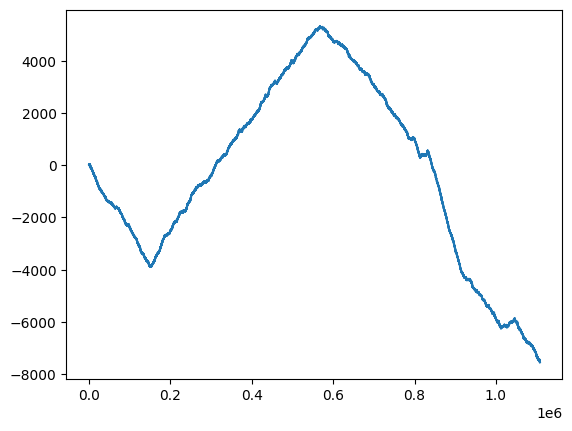

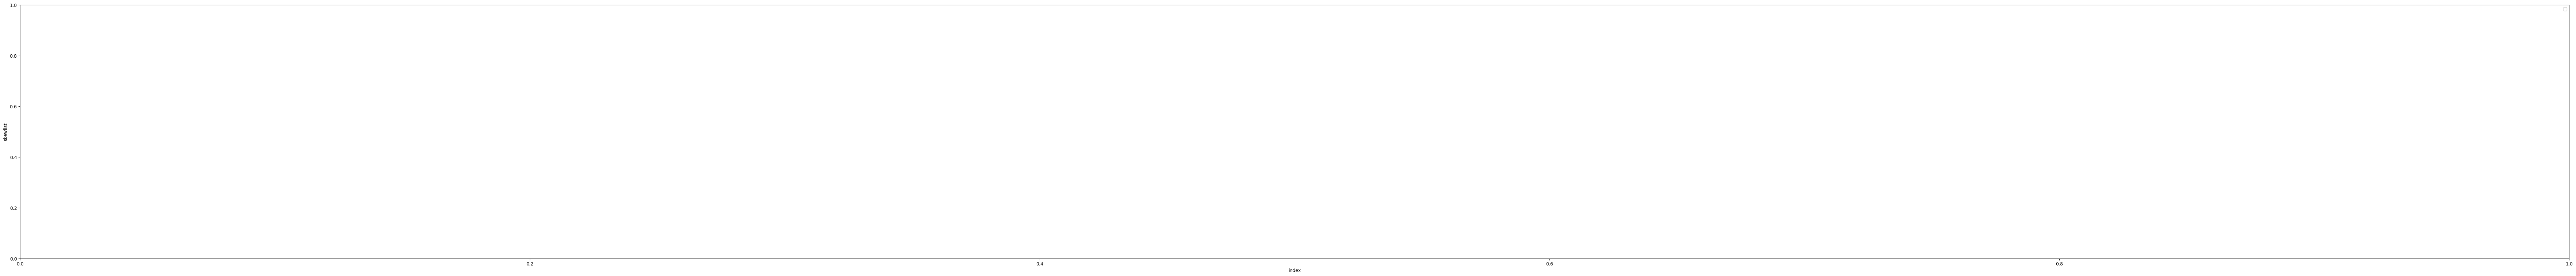

In [ ]:
import matplotlib.pyplot as plt
#histplot plotting index in x axis and skewlist[index] in y axis both for pattern and pattern1

shortcholera=skewlist(seq_list)

plt.plot(shortcholera,label='cholera')
plt.figure(figsize=(100, 10))
plt.legend()
plt.xlabel('index')
plt.ylabel('skewlist')
plt.show()

#Finding using min list

In [ ]:
ran=minlist[int(len(minlist)/2)]

In [ ]:
seq_portion=seq_list[ran-2000:ran+500]

In [ ]:
len(seq_portion)

2043

In [ ]:
finding_k_mer_positions=pattern_occurrence_with_mismatches(seq_portion,250,9,6,2)

In [ ]:
finding_k_mer_positions

{'GTTTCCATA': 1085, 'TTTCCATAC': 1128, 'AAATTGTTG': 1778}

#Finding Ori New way

In [ ]:
def findingminima(skew_value_listC2,depth,gap):

  oridiction={}
  for i in range(depth,len(skew_value_listC2)-depth,gap):
    mean=(skew_value_listC2[i-int(depth/2)]+skew_value_listC2[i+int(depth/2)])/2
    mid=skew_value_listC2[i]
    diff=mid-mean
    oridiction[i]=diff
    minvalue=min(oridiction.values())
    lowerbound=minvalue-20
    upperbound=minvalue+20
    minlist=[k for k,v in oridiction.items() if ((lowerbound<=v) & (v<=upperbound))]
  return minlist




In [ ]:
listminima=findingminima(skew_value_listC2,100000,500)

In [ ]:
listminima

[149000,
 149500,
 150000,
 150500,
 151000,
 151500,
 152000,
 152500,
 153000,
 153500]

In [ ]:
predicted_ori_start=listminima[int(len(listminima)/2)]

In [ ]:
predicted_ori_start

151500

In [ ]:
minima_seq_ran=seq_list[predicted_ori_start-2000:predicted_ori_start+2000]

In [ ]:
#If by giving exact hd=0 we get 3 then we are sure that it is the ori
finding_k_mer_positions=pattern_occurrence_with_mismatches(minima_seq_ran,600,9,6,0)


In [ ]:
finding_k_mer_positions #one thing is sure that the oriC is after 1000

{'ATGATCATG': [2298, 2299, 2344, 2366, 2633, 2634],
 'ATGATCAAG': [2413, 2513, 2783, 2854, 2894, 2911]}

In [ ]:
#this is a strong indication when using hd=0 that we can start from
#1290-1920


In [ ]:
finding_k_mer_one_hd=pattern_occurrence_with_mismatches(minima_seq_ran,600,9,6,1)

In [ ]:
finding_k_mer_one_hd

{'GATGATCAT': [2028, 2029, 2298, 2299, 2344, 2345, 2366, 2367, 2390, 2512],
 'TGATCATGG': [2297,
  2300,
  2320,
  2343,
  2365,
  2388,
  2411,
  2632,
  2635,
  2842,
  2856],
 'ATGATCAAT': [2322, 2413, 2513, 2744, 2783, 2854, 2894, 2911],
 'AAGCATGAT': [2295, 2341, 2363, 2409, 2630, 2890]}

#Removing the outliers to find ORI

In [ ]:
all_positions = []
for positions in finding_k_mer_one_hd.values():
    all_positions.extend(positions)


In [ ]:
all_positions

[2028,
 2029,
 2298,
 2299,
 2344,
 2345,
 2366,
 2367,
 2390,
 2512,
 2297,
 2300,
 2320,
 2343,
 2365,
 2388,
 2411,
 2632,
 2635,
 2842,
 2856,
 2322,
 2413,
 2513,
 2744,
 2783,
 2854,
 2894,
 2911,
 2295,
 2341,
 2363,
 2409,
 2630,
 2890]

#Combining the list with AT

combing the list we got with position of most frequent k mers with the list of poly AT region meaning as there is an immediate start of poly AT

In [ ]:
def find_poly_AT_regions(seq, window_size=50, AT_threshold=0.8):
    poly_AT_positions = []

    for i in range(len(seq) - window_size + 1):
        window = seq[i:i+window_size]
        at_count = sum(1 for base in window if base in ['A', 'T'])
        at_ratio = at_count / window_size

        if at_ratio >= AT_threshold:
            poly_AT_positions.append(i)

    return poly_AT_positions


In [ ]:
predicted_ori_start

151500

In [ ]:
minima_seq=seq_list[predicted_ori_start-2000:predicted_ori_start+2000]

In [ ]:
AT_region=find_poly_AT_regions(minima_seq_ran,window_size=30,AT_threshold=0.8)
AT_region

[2129,
 2130,
 2131,
 2132,
 2133,
 2134,
 2135,
 2136,
 2137,
 2138,
 2139,
 2140,
 2141,
 2142,
 2143,
 2144,
 2145,
 2146,
 2147,
 2148,
 2149,
 2150,
 2151,
 2152,
 2153,
 2154,
 2155,
 2156,
 2157,
 2158,
 2159,
 2160,
 2161,
 2162,
 2163,
 2164,
 2165,
 2166,
 2171,
 2172,
 2173,
 2174,
 2175,
 2176,
 2177,
 2178,
 2179,
 2180,
 2181,
 2182,
 2183,
 2184,
 2185,
 2186,
 2187,
 2188,
 2189,
 2190,
 2191,
 2192,
 2193,
 2194,
 2195,
 2196,
 2197,
 2198,
 2199,
 2200,
 2201,
 2202,
 2238,
 2239,
 2240,
 2241,
 2242,
 2243,
 2244,
 2245,
 2246,
 2247,
 2248,
 2249,
 2250,
 2251,
 2252,
 2253,
 2254,
 2255,
 2256,
 2257,
 2258,
 2259,
 2260,
 2261,
 2262,
 2264,
 3093,
 3094,
 3095,
 3096,
 3097,
 3098,
 3099,
 3100,
 3101,
 3109,
 3113,
 3218,
 3242,
 3243,
 3244,
 3245,
 3249,
 3255]

In [ ]:
poly_at_window_size = 30

# Step 2: Identify poly-AT clusters (distance <= 10, adjustable)
def cluster_positions(positions, max_dist=10):
    clusters = []
    current_cluster = [positions[0]]

    for i in range(1, len(positions)):
        if positions[i] - positions[i-1] <= max_dist:
            current_cluster.append(positions[i])
        else:
            if len(current_cluster) >= 2:
                clusters.append(current_cluster)
            current_cluster = [positions[i]]

    if len(current_cluster) >= 2:
        clusters.append(current_cluster)

    return clusters




In [ ]:
# Step 3: Filter only clustered poly-AT starts and add window offset
clustered_poly_at = cluster_positions(sorted(AT_region))
clustered_poly_at_positions = [min(cluster)  for cluster in clustered_poly_at]



In [ ]:
clustered_poly_at

[[2129,
  2130,
  2131,
  2132,
  2133,
  2134,
  2135,
  2136,
  2137,
  2138,
  2139,
  2140,
  2141,
  2142,
  2143,
  2144,
  2145,
  2146,
  2147,
  2148,
  2149,
  2150,
  2151,
  2152,
  2153,
  2154,
  2155,
  2156,
  2157,
  2158,
  2159,
  2160,
  2161,
  2162,
  2163,
  2164,
  2165,
  2166,
  2171,
  2172,
  2173,
  2174,
  2175,
  2176,
  2177,
  2178,
  2179,
  2180,
  2181,
  2182,
  2183,
  2184,
  2185,
  2186,
  2187,
  2188,
  2189,
  2190,
  2191,
  2192,
  2193,
  2194,
  2195,
  2196,
  2197,
  2198,
  2199,
  2200,
  2201,
  2202],
 [2238,
  2239,
  2240,
  2241,
  2242,
  2243,
  2244,
  2245,
  2246,
  2247,
  2248,
  2249,
  2250,
  2251,
  2252,
  2253,
  2254,
  2255,
  2256,
  2257,
  2258,
  2259,
  2260,
  2261,
  2262,
  2264],
 [3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3109, 3113],
 [3242, 3243, 3244, 3245, 3249, 3255]]

In [ ]:
clustered_poly_at_positions.sort()
clustered_poly_at_positions

[2129, 2238, 3093, 3242]

In [ ]:
#Taking those who fell between two AT reg

def filter_between_clusters(ori_positions, poly_at_clusters):
    poly_at_clusters = sorted(poly_at_clusters)

    # Look for the first pair where a cluster surrounds ori positions
    for i in range(len(poly_at_clusters) - 1):
        start = poly_at_clusters[i]
        end = poly_at_clusters[i + 1]

        filtered = [pos for pos in ori_positions if start <= pos <= end]
        if len(filtered) >= 5:  # Adjustable threshold
            return filtered, start, end

    return [], None, None  # If no valid interval found

In [ ]:
filtered_hits, at_start, at_end = filter_between_clusters(all_positions, clustered_poly_at_positions)

In [ ]:
filtered_hits.sort()

In [ ]:
ori_with_out_AT=minima_seq_ran[filtered_hits[0]:filtered_hits[-1]+9] #Here Nine is okay containing all frequent 9 mers
ori_with_out_AT

'AAGCATGATCATGTATCGATGGAAACCATGATCAATACAAGATCGAAAGCATGATCATTTGTTCCTCTAAGCATGATCATCAGTCAACAGAATCAATGATCAACGTAAGCTTCTAAGCATGATCAAGGTGCTCACACAGTTTATCCACAACCTGAGTGGATGACATCAAGATAGGTCGTTGTATCTCCTTCCTCTCGTACTCTCATGACCACGGAAAGATGATCAAGAGAGGATGATTTCTTGGCCATATCGCAATGAATACTTGTGACTTGTGCTTCCAATTGACATCTTCAGCGCCATATTGCGCTGGCCAAGGTGACGGAGCGGGATTACGAAAGCATGATCATGGCTGTTGTTCTGTTTATCTTGTTTTGACTGAGACTTGTTAGGATAGACGGTTTTTCATCACTGACTAGCCAAAGCCTTACTCTGCCTGACATCGACCGTAAATTGATAATGAATTTACATGCTTCCGCGACGATTTACCTCTTGATCATCGATCCGATTGAAGATCTTCAATTGTTAATTCTCTTGCCTCGACTCATAGCCATGATGAGCTCTTGATCATGTTTCCTTAACCCTCTATTTTTTACGGAAGAATGATCAAGCTGCTGCTCTTGATCAT'

In [ ]:
len(ori_with_out_AT)

625

In [ ]:
ori_with_at=minima_seq_ran[at_start:at_end+30]
ori_with_at

'TGACGATTTTTAGTTCTAATTTATTGTAATTAAAAGAGATTATTTTAAGCCATTCAGAAGCATGATCATGTATCGATGGAAACCATGATCAATACAAGATCGAAAGCATGATCATTTGTTCCTCTAAGCATGATCATCAGTCAACAGAATCAATGATCAACGTAAGCTTCTAAGCATGATCAAGGTGCTCACACAGTTTATCCACAACCTGAGTGGATGACATCAAGATAGGTCGTTGTATCTCCTTCCTCTCGTACTCTCATGACCACGGAAAGATGATCAAGAGAGGATGATTTCTTGGCCATATCGCAATGAATACTTGTGACTTGTGCTTCCAATTGACATCTTCAGCGCCATATTGCGCTGGCCAAGGTGACGGAGCGGGATTACGAAAGCATGATCATGGCTGTTGTTCTGTTTATCTTGTTTTGACTGAGACTTGTTAGGATAGACGGTTTTTCATCACTGACTAGCCAAAGCCTTACTCTGCCTGACATCGACCGTAAATTGATAATGAATTTACATGCTTCCGCGACGATTTACCTCTTGATCATCGATCCGATTGAAGATCTTCAATTGTTAATTCTCTTGCCTCGACTCATAGCCATGATGAGCTCTTGATCATGTTTCCTTAACCCTCTATTTTTTACGGAAGAATGATCAAGCTGCTGCTCTTGATCATCGTTTCGGTGATACCTATTCGCTGGAGGAAAGATAGGCATTTTCTCATCTTGCTTGAATCCTGCGCATCATTTCAATCAGAATGGCATTCACCGTAACTTAGTGGCTCGGTTTAATCGTTCCGCTTACGGCTCGCTTTTATTTATTCATCATCACTTCAAAACGTGGCTTTACATTGTAAATAAGTGACACTGTAATATTTAA'

In [ ]:
len(ori_with_at)

885

In [ ]:
#Here 1 interesting thing with outlier 1029 and 1080 everything is within 1295 and 1920
#strong indication that there is the ori region with in this range
#also with other important signals which are also occuring along with the dnaA box


In [ ]:
#Here we get four nine_mers among them three are mostly before the 1400 meaning
#they are before the ori
#so they may be important signals before ori  or in mid of ori which need further exploration

#Optional
Check For other frequent patterns

In [ ]:
finding_k_mer_positions_four=pattern_occurrence_with_mismatches(minima_seq_ran,300,4,6,0)

In [ ]:
finding_k_mer_positions_four

{'GGTT': [1477, 1504, 1605, 1684, 1705, 1731, 1737, 1759],
 'GTTT': [3167, 3189, 3241, 3263, 3272, 3291, 3333, 3456],
 'AAAA': [3427, 3533, 3534, 3620, 3621, 3622, 3623, 3624, 3666],
 'TCAA': [3723, 3752, 3756, 3791, 3840, 3919, 3932],
 'CAAT': [3093, 3198, 3217, 3238, 3285, 3313, 3318, 3392],
 'ATCG': [2733, 2773, 2790, 2792, 2797, 2918],
 'CCAA': [537, 587, 624, 650, 659, 709],
 'GCTC': [113, 137, 259, 261, 274, 334, 336],
 'CATC': [3419, 3488, 3505, 3521, 3583, 3587, 3649],
 'AGCC': [1573, 1588, 1710, 1768, 1772, 1846],
 'CTCT': [3326, 3340, 3347, 3406, 3553, 3559, 3561],
 'ATCA': [3522, 3546, 3582, 3647, 3650, 3685, 3753, 3803],
 'GCTA': [200, 322, 381, 386, 409, 484],
 'AAGC': [3296, 3355, 3444, 3468, 3482, 3484, 3492, 3513, 3570],
 'AACG': [394, 404, 429, 600, 638, 648],
 'ACCA': [1478, 1490, 1559, 1606, 1704, 1730, 1758],
 'ACGC': [1638, 1786, 1852, 1854, 1915, 1924],
 'TCCA': [3433, 3453, 3507, 3585, 3609, 3644, 3729],
 'TTTC': [1895, 1960, 2070, 2140, 2161, 2191],
 'GAAG': [99

In [ ]:
finding_k_mer_positions_four['ACGC']

[1638, 1786, 1852, 1854, 1915, 1924]

In [ ]:
finding_k_mer_positions_six=pattern_occurrence_with_mismatches(minima_seq_ran,500,6,6,0)

In [ ]:
finding_k_mer_positions_six

{'ATGATC': [2148,
  2230,
  2299,
  2301,
  2322,
  2345,
  2347,
  2367,
  2369,
  2390,
  2413,
  2513,
  2634,
  2636],
 'TGATCA': [2058, 2300, 2323, 2346, 2368, 2391, 2414, 2514],
 'ATCATG': [2298, 2302, 2321, 2344, 2366, 2412, 2633, 2637],
 'GATCAA': [2057, 2059, 2324, 2392, 2415, 2515],
 'CATGCT': [2296, 2342, 2364, 2410, 2631, 2760],
 'ATGCTT': [2295, 2341, 2363, 2409, 2630, 2761],
 'CTTGAT': [2416, 2459, 2516, 2783, 2854, 2897, 2911]}

#Real ori got from bioinformatics course

In [ ]:
ori_real='atcaatgatcaacgtaagcttctaagcATGATCAAGgtgctcacacagtttatccacaac ctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgacca cggaaagATGATCAAGagaggatgatttcttggccatatcgcaatgaatacttgtgactt gtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggatt acgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttagga tagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaat tgataatgaatttacatgcttccgcgacgatttacctCTTGATCATcgatccgattgaag atcttcaattgttaattctcttgcctcgactcatagccatgatgagctCTTGATCATgtt tccttaaccctctattttttacggaagaATGATCAAGctgctgctCTTGATCATcgtttc'

In [ ]:
len(ori_real) #so as here the ori real is bigger a bit real thing is not coming in the window

548

In [ ]:
ori_real.upper()

'ATCAATGATCAACGTAAGCTTCTAAGCATGATCAAGGTGCTCACACAGTTTATCCACAAC CTGAGTGGATGACATCAAGATAGGTCGTTGTATCTCCTTCCTCTCGTACTCTCATGACCA CGGAAAGATGATCAAGAGAGGATGATTTCTTGGCCATATCGCAATGAATACTTGTGACTT GTGCTTCCAATTGACATCTTCAGCGCCATATTGCGCTGGCCAAGGTGACGGAGCGGGATT ACGAAAGCATGATCATGGCTGTTGTTCTGTTTATCTTGTTTTGACTGAGACTTGTTAGGA TAGACGGTTTTTCATCACTGACTAGCCAAAGCCTTACTCTGCCTGACATCGACCGTAAAT TGATAATGAATTTACATGCTTCCGCGACGATTTACCTCTTGATCATCGATCCGATTGAAG ATCTTCAATTGTTAATTCTCTTGCCTCGACTCATAGCCATGATGAGCTCTTGATCATGTT TCCTTAACCCTCTATTTTTTACGGAAGAATGATCAAGCTGCTGCTCTTGATCATCGTTTC'

In [ ]:
len(ori_real)

548

#Aligning the protein sequence of dnaA with oriC

In [ ]:
protein='NFTGRPITIDFVREALRDLLALQEKLVTIDNIQKTVAEYYKIKVADLLSKRRSRSVARPRQLAMALAKELTNHSLPEIGDAFGGRDHTTVLHACRKIEQLREESHDIKEDYSNLIRTLSS'

In [ ]:
len(ori_with_out_AT)

625

In [ ]:
#We will first apply global alignment with this final_oriC
#first converting the dna sequence in protein sequence
# Codon to amino acid mapping table (standard genetic code)
codon_table = {
    'AUG':'M', 'UGA':'*', 'UAA':'*', 'UAG':'*',
    'UUU':'F', 'UUC':'F', 'UUA':'L', 'UUG':'L',
    'CUU':'L', 'CUC':'L', 'CUA':'L', 'CUG':'L',
    'AUU':'I', 'AUC':'I', 'AUA':'I', 'GUU':'V',
    'GUC':'V', 'GUA':'V', 'GUG':'V', 'UCU':'S',
    'UCC':'S', 'UCA':'S', 'UCG':'S', 'AGU':'S',
    'AGC':'S', 'CCU':'P', 'CCC':'P', 'CCA':'P',
    'CCG':'P', 'ACU':'T', 'ACC':'T', 'ACA':'T',
    'ACG':'T', 'GCU':'A', 'GCC':'A', 'GCA':'A',
    'GCG':'A', 'UAU':'Y', 'UAC':'Y', 'CAU':'H',
    'CAC':'H', 'CAA':'Q', 'CAG':'Q', 'AAU':'N',
    'AAC':'N', 'AAA':'K', 'AAG':'K', 'GAU':'D',
    'GAC':'D', 'GAA':'E', 'GAG':'E', 'UGU':'C',
    'UGC':'C', 'UGG':'W', 'CGU':'R', 'CGC':'R',
    'CGA':'R', 'CGG':'R', 'AGA':'R', 'AGG':'R',
    'GGU':'G', 'GGC':'G', 'GGA':'G', 'GGG':'G'
}

def dna_to_protein(dna):
    # Step 1: Transcribe DNA to mRNA
    rna = dna.upper().replace('T', 'U')

    # Step 2: Translate mRNA to protein
    protein = ''
    for i in range(0, len(rna) - 2, 3):  # Read in codons
        codon = rna[i:i+3]
        amino_acid = codon_table.get(codon, '')
        if amino_acid == '*':  # Stop codon
            break
        protein += amino_acid
    return protein

# Example usage:
dna_seq = "ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG"
protein_seq = dna_to_protein(dna_seq)
print("Protein Sequence:", protein_seq)


Protein Sequence: MAIVMGR


In [ ]:
final_oriC

'ATTTATTGTAATTAAAAGAGATTATTTTAAGCCATTCAGAAGCATGATCATGTATCGATGGAAACCATGATCAATACAAGATCGAAAGCATGATCATTTGTTCCTCTAAGCATGATCATCAGTCAACAGAATCAATGATCAACGTAAGCTTCTAAGCATGATCAAGGTGCTCACACAGTTTATCCACAACCTGAGTGGATGACATCAAGATAGGTCGTTGTATCTCCTTCCTCTCGTACTCTCATGACCACGGAAAGATGATCAAGAGAGGATGATTTCTTGGCCATATCGCAATGAATACTTGTGACTTGTGCTTCCAATTGACATCTTCAGCGCCATATTGCGCTGGCCAAGGTGACGGAGCGGGATTACGAAAGCATGATCATGGCTGTTGTTCTGTTTATCTTGTTTTGACTGAGACTTGTTAGGATAGACGGTTTTTCATCACTGACTAGCCAAAGCCTTACTCTGCCTGACATCGACCGTAAATTGATAATGAATTTACATGCTTCCGCGACGATTTACCTCTTGATCATCGATCCGATTGAAGATCTTCAATTGTTAATTCTCTTGCCTCGACTCATAGCCATGATGAGCTCTTGATCATGTTTCCTTAACCCTCTATTTTTTACGGAAGAATGATCAAGCTGCTGCTCTTGATCAT'

In [ ]:
def dna_to_protein_frames(dna):
    dna = dna.upper().replace('T', 'U')  # Transcribe to RNA
    frames = []

    for frame in range(3):  # Frame 0, 1, 2
        protein = ''
        for i in range(frame, len(dna) - 2, 3):
            codon = dna[i:i+3]
            aa = codon_table.get(codon, '')

            protein += aa
        frames.append(protein)

    return frames




In [ ]:
frames=dna_to_protein_frames(ori_with_at)
frames

['*RFLVLIYCN*KRLF*AIQKHDHVSMETMINTRSKA*SFVPLSMIISQQNQ*ST*ASKHDQGAHTVYPQPEWMTSR*VVVSPSSRTLMTTER*SREDDFLAISQ*ILVTCASN*HLQRHIALAKVTERDYESMIMAVVLFILF*LRLVRIDGFSSLTSQSLTLPDIDRKLIMNLHASATIYLLIIDPIEDLQLLILLPRLIAMMSS*SCFLNPLFFTEE*SSCCS*SSFR*YLFAGGKIGIFSSCLNPAHHFNQNGIHRNLVARFNRSAYGSLLFIHHHFKTWLYIVNK*HCNI*',
 'DDF*F*FIVIKRDYFKPFRSMIMYRWKP*SIQDRKHDHLFL*A*SSVNRINDQRKLLSMIKVLTQFIHNLSG*HQDRSLYLLPLVLS*PRKDDQERMISWPYRNEYL*LVLPIDIFSAILRWPR*RSGITKA*SWLLFCLSCFD*DLLG*TVFHH*LAKALLCLTSTVN***IYMLPRRFTS*SSIRLKIFNC*FSCLDS*P**ALDHVSLTLYFLRKNDQAAALDHRFGDTYSLEER*AFSHLA*ILRIISIRMAFTVT*WLGLIVPLTARFYLFIITSKRGFTL*ISDTVIF',
 'TIFSSNLL*LKEIILSHSEA*SCIDGNHDQYKIESMIICSSKHDHQSTESMINVSF*A*SRCSHSLSTT*VDDIKIGRCISFLSYSHDHGKMIKRG*FLGHIAMNTCDLCFQLTSSAPYCAGQGDGAGLRKHDHGCCSVYLVLTETC*DRRFFITD*PKPYSA*HRP*IDNEFTCFRDDLPLDHRSD*RSSIVNSLASTHSHDELLIMFP*PSIFYGRMIKLLLLIIVSVIPIRWRKDRHFLILLESCASFQSEWHSP*LSGSV*SFRLRLAFIYSSSLQNVALHCK*VTL*YL']

In [ ]:
def LCSBackTrack_Penalty_Global(v, w, match_score, mismatch_penalty, gap_open_penalty, gap_extend_penalty):
    n, m = len(v), len(w)

    # Initialize scoring matrices
    middle = [[0] * (m + 1) for _ in range(n + 1)]
    lower = [[float('-inf')] * (m + 1) for _ in range(n + 1)]
    upper = [[float('-inf')] * (m + 1) for _ in range(n + 1)]

    # Initialize backtrack matrices
    backtrack_middle = [[''] * (m + 1) for _ in range(n + 1)]
    backtrack_lower = [[''] * (m + 1) for _ in range(n + 1)]
    backtrack_upper = [[''] * (m + 1) for _ in range(n + 1)]

    # Global initialization
    middle[0][0] = 0
    for i in range(1, n + 1):
        lower[i][0] = gap_open_penalty + (i - 1) * gap_extend_penalty
        middle[i][0] = lower[i][0]
        backtrack_middle[i][0] = '↓'
        backtrack_lower[i][0] = '↓'

    for j in range(1, m + 1):
        upper[0][j] = gap_open_penalty + (j - 1) * gap_extend_penalty
        middle[0][j] = upper[0][j]
        backtrack_middle[0][j] = '→'
        backtrack_upper[0][j] = '→'

    # Fill in matrices
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            match_or_mismatch = match_score if v[i - 1] == w[j - 1] else mismatch_penalty

            # Update lower (↓)
            if lower[i - 1][j] + gap_extend_penalty >= middle[i - 1][j] + gap_open_penalty:
                lower[i][j] = lower[i - 1][j] + gap_extend_penalty
                backtrack_lower[i][j] = '↓'
            else:
                lower[i][j] = middle[i - 1][j] + gap_open_penalty
                backtrack_lower[i][j] = '↕'  # from middle

            # Update upper (→)
            if upper[i][j - 1] + gap_extend_penalty >= middle[i][j - 1] + gap_open_penalty:
                upper[i][j] = upper[i][j - 1] + gap_extend_penalty
                backtrack_upper[i][j] = '→'
            else:
                upper[i][j] = middle[i][j - 1] + gap_open_penalty
                backtrack_upper[i][j] = '↔'  # from middle

            # Update middle (↖)
            candidates = [
                (lower[i][j], '↓'),
                (upper[i][j], '→'),
                (middle[i - 1][j - 1] + match_or_mismatch, '↖')
            ]
            middle[i][j], backtrack_middle[i][j] = max(candidates)

    return middle[i][j], backtrack_middle, backtrack_lower, backtrack_upper


In [ ]:
maximum=-1000
for i in range(len(frames)):
  max_score,bactrack_m,bactrack_l,backtrack_u=LCSBackTrack_Penalty_Global(frames[i],protein,1,-3,-3,-1)
  if max_score>maximum:
    maximum=max_score
    index=i

In [ ]:
index

1

In [ ]:
scoring,bactrack_m,bactrack_l,backtrack_u=LCSBackTrack_Penalty_Global(frames[index],protein,1,-3,-3,-1)

In [ ]:
scoring

-332

In [ ]:
def BacktrackAffine(v, w, backtrack_middle, backtrack_lower, backtrack_upper):
    aligned_v = []
    aligned_w = []

    i, j = len(v), len(w)
    state = 'middle'

    while i > 0 or j > 0:
        if state == 'middle':
            direction = backtrack_middle[i][j]
            if direction == '↖':
                aligned_v.append(v[i - 1])
                aligned_w.append(w[j - 1])
                i -= 1
                j -= 1
            elif direction == '↓':
                state = 'lower'
            elif direction == '→':
                state = 'upper'

        elif state == 'lower':
            direction = backtrack_lower[i][j]
            aligned_v.append(v[i - 1])
            aligned_w.append('-')
            i -= 1
            if direction == '↕':
                state = 'middle'

        elif state == 'upper':
            direction = backtrack_upper[i][j]
            aligned_v.append('-')
            aligned_w.append(w[j - 1])
            j -= 1
            if direction == '↔':
                state = 'middle'

    return ''.join(reversed(aligned_v)), ''.join(reversed(aligned_w))


In [ ]:
mod_v,mod_w=BacktrackAffine(frames[index],protein,bactrack_m,bactrack_l,backtrack_u)

mod_v

'DDF*F*F----IVIKRDYFKPF-----RSMIMYRWKP*SIQDRKHDHLFL*A*SSVNRINDQRKL---------------LSMIKV--LTQFIHNLSG*HQDRSLYLLPLVLS*PRKDDQERMISWPYRNEYL*LVLPIDIFSAILRWPR*RSGITKA*SWLLFCLSCFD*DLLG*TVFHH*LAKAL-LCLT--STVN***IYMLP--------RRFTS*SSIRLKIFNC*FSCLDS*P**ALDH--VSLTLYFL---RKNDQAAALDHRFGDTYSLEER*AFSH--------LA*ILRIISIRMAFTVT*WLGLIVPLTARFYLFIITSKRGFTL*ISDTVIF'

In [ ]:
mod_v.find('MI')

29

In [ ]:
mod_v.find('IM')

30

In [ ]:
mod_w

'-----NFTGRPITI--D----FVREALR-----------------DLLAL-----------QEKLVTIDNIQKTVAEYYK---IKVADL------LS---KRRS-----------R--------S----------V-------A--R-PR-------------------------------QLAMALAKELTNHS---------LPEIGDAFGGR----------------------------DHTTV------LHACRKIEQ---L--R-------EE----SHDIKEDYSNL--------IR------------------------------TL--S----S'

In [ ]:
def hamming_distance(str1,str2):
  m=0
  store={}
  for i in range(len(str1)):
    if str1[i]==str2[i]:
      store[i]=str1[i]
      m+=1
  return m,store

In [ ]:
m,store=hamming_distance(mod_v,mod_w)
m

56

In [ ]:
store

{6: 'F',
 11: 'I',
 13: 'I',
 16: 'D',
 21: 'F',
 27: 'R',
 45: 'D',
 47: 'L',
 49: 'L',
 61: 'Q',
 63: 'K',
 64: 'L',
 83: 'I',
 84: 'K',
 85: 'V',
 88: 'L',
 95: 'L',
 96: 'S',
 102: 'R',
 103: 'S',
 115: 'R',
 124: 'S',
 135: 'V',
 143: 'A',
 146: 'R',
 148: 'P',
 149: 'R',
 182: 'L',
 183: 'A',
 185: 'A',
 186: 'L',
 190: 'L',
 191: 'T',
 194: 'S',
 204: 'L',
 205: 'P',
 214: 'R',
 243: 'D',
 244: 'H',
 247: 'V',
 254: 'L',
 258: 'R',
 259: 'K',
 262: 'Q',
 266: 'L',
 269: 'R',
 277: 'E',
 278: 'E',
 283: 'S',
 284: 'H',
 293: 'L',
 302: 'I',
 303: 'R',
 334: 'T',
 335: 'L',
 338: 'S'}

In [ ]:
len(seq1)

111

In [ ]:
final_ori_frames=dna_to_protein_frames(final_oriC)
final_ori_frames

['IYCN', 'FIVIKRDYFKPFRSMIMYRWKP', 'LL']

#Using fitting Alignment in whole region around min skew

In [ ]:
protein='NFTGRPITIDFVREALRDLLALQEKLVTIDNIQKTVAEYYKIKVADLLSKRRSRSVARPRQLAMALAKELTNHSLPEIGDAFGGRDHTTVLHACRKIEQLREESHDIKEDYSNLIRTLSS'

In [ ]:
BLOSUM62={
    'A': {'A': 4, 'C': 0, 'D': -2, 'E': -1, 'F': -2, 'G': 0, 'H': -2, 'I': -1, 'K': -1, 'L': -1, 'M': -1, 'N': -2, 'P': -1, 'Q': -1, 'R': -1, 'S': 1, 'T': 0, 'V': 0, 'W': -3, 'Y': -2},
    'C': {'A': 0, 'C': 9, 'D': -3, 'E': -4, 'F': -2, 'G': -3, 'H': -3, 'I': -1, 'K': -3, 'L': -1, 'M': -1, 'N': -3, 'P': -3, 'Q': -3, 'R': -3, 'S': -1, 'T': -1, 'V': -1, 'W': -2, 'Y': -2},
    'D': {'A': -2, 'C': -3, 'D': 6, 'E': 2, 'F': -3, 'G': -1, 'H': -1, 'I': -3, 'K': -1, 'L': -4, 'M': -3, 'N': 1, 'P': -1, 'Q': 0, 'R': -2, 'S': 0, 'T': -1, 'V': -3, 'W': -4, 'Y': -3},
    'E': {'A': -1, 'C': -4, 'D': 2, 'E': 5, 'F': -3, 'G': -2, 'H': 0, 'I': -3, 'K': 1, 'L': -3, 'M': -2, 'N': 0, 'P': -1, 'Q': 2, 'R': 0, 'S': 0, 'T': -1, 'V': -2, 'W': -3, 'Y': -2},
    'F': {'A': -2, 'C': -2, 'D': -3, 'E': -3, 'F': 6, 'G': -3, 'H': -1, 'I': 0, 'K': -3, 'L': 0, 'M': 0, 'N': -3, 'P': -4, 'Q': -3, 'R': -3, 'S': -2, 'T': -2, 'V': -1, 'W': 1, 'Y': 3},
    'G': {'A': 0, 'C': -3, 'D': -1, 'E': -2, 'F': -3, 'G': 6, 'H': -2, 'I': -4, 'K': -2, 'L': -4, 'M': -3, 'N': 0, 'P': -2, 'Q': -2, 'R': -2, 'S': 0, 'T': -2, 'V': -3, 'W': -2, 'Y': -3},
    'H': {'A': -2, 'C': -3, 'D': -1, 'E': 0, 'F': -1, 'G': -2, 'H': 8, 'I': -3, 'K': -1, 'L': -3, 'M': -2, 'N': 1, 'P': -2, 'Q': 0, 'R': 0, 'S': -1, 'T': -2, 'V': -3, 'W': -2, 'Y': 2},
    'I': {'A': -1, 'C': -1, 'D': -3, 'E': -3, 'F': 0, 'G': -4, 'H': -3, 'I': 4, 'K': -3, 'L': 2, 'M': 1, 'N': -3, 'P': -3, 'Q': -3, 'R': -3, 'S': -2, 'T': -1, 'V': 3, 'W': -3, 'Y': -1},
    'K': {'A': -1, 'C': -3, 'D': -1, 'E': 1, 'F': -3, 'G': -2, 'H': -1, 'I': -3, 'K': 5, 'L': -2, 'M': -1, 'N': 0, 'P': -1, 'Q': 1, 'R': 2, 'S': 0, 'T': -1, 'V': -2, 'W': -3, 'Y': -2},
    'L': {'A': -1, 'C': -1, 'D': -4, 'E': -3, 'F': 0, 'G': -4, 'H': -3, 'I': 2, 'K': -2, 'L': 4, 'M': 2, 'N': -3, 'P': -3, 'Q': -2, 'R': -2, 'S': -2, 'T': -1, 'V': 1, 'W': -2, 'Y': -1},
    'M': {'A': -1, 'C': -1, 'D': -3, 'E': -2, 'F': 0, 'G': -3, 'H': -2, 'I': 1, 'K': -1, 'L': 2, 'M': 5, 'N': -2, 'P': -2, 'Q': 0, 'R': -1, 'S': -1, 'T': -1, 'V': 1, 'W': -1, 'Y': -1},
    'N': {'A': -2, 'C': -3, 'D': 1, 'E': 0, 'F': -3, 'G': 0, 'H': 1, 'I': -3, 'K': 0, 'L': -3, 'M': -2, 'N': 6, 'P': -2, 'Q': 0, 'R': 0, 'S': 1, 'T': 0, 'V': -3, 'W': -4, 'Y': -2},
    'P': {'A': -1, 'C': -3, 'D': -1, 'E': -1, 'F': -4, 'G': -2, 'H': -2, 'I': -3, 'K': -1, 'L': -3, 'M': -2, 'N': -2, 'P': 7, 'Q': -1, 'R': -2, 'S': -1, 'T': -1, 'V': -2, 'W': -4, 'Y': -3},
    'Q': {'A': -1, 'C': -3, 'D': 0, 'E': 2, 'F': -3, 'G': -2, 'H': 0, 'I': -3, 'K': 1, 'L': -2, 'M': 0, 'N': 0, 'P': -1, 'Q': 5, 'R': 1, 'S': 0, 'T': -1, 'V': -2, 'W': -2, 'Y': -1},
    'R': {'A': -1, 'C': -3, 'D': -2, 'E': 0, 'F': -3, 'G': -2, 'H': 0, 'I': -3, 'K': 2, 'L': -2, 'M': -1, 'N': 0, 'P': -2, 'Q': 1, 'R': 5, 'S': -1, 'T': -1, 'V': -3, 'W': -3, 'Y': -2},
    'S': {'A': 1, 'C': -1, 'D': 0, 'E': 0, 'F': -2, 'G': 0, 'H': -1, 'I': -2, 'K': 0, 'L': -2, 'M': -1, 'N': 1, 'P': -1, 'Q': 0, 'R': -1, 'S': 4, 'T': 1, 'V': -2, 'W': -3, 'Y': -2},
    'T': {'A': 0, 'C': -1, 'D': -1, 'E': -1, 'F': -2, 'G': -2, 'H': -2, 'I': -1, 'K': -1, 'L': -1, 'M': -1, 'N': 0, 'P': -1, 'Q': -1, 'R': -1, 'S': 1, 'T': 5, 'V': 0, 'W': -2, 'Y': -2},
    'V': {'A': 0, 'C': -1, 'D': -3, 'E': -2, 'F': -1, 'G': -3, 'H': -3, 'I': 3, 'K': -2, 'L': 1, 'M': 1, 'N': -3, 'P': -2, 'Q': -2, 'R': -3, 'S': -2, 'T': 0, 'V': 4, 'W': -3, 'Y': -1},
    'W': {'A': -3, 'C': -2, 'D': -4, 'E': -3, 'F': 1, 'G': -2, 'H': -2, 'I': -3, 'K': -3, 'L': -2, 'M': -1, 'N': -4, 'P': -4, 'Q': -2, 'R': -3, 'S': -3, 'T': -2, 'V': -3, 'W': 11, 'Y': 2},
    'Y': {'A': -2, 'C': -2, 'D': -3, 'E': -2, 'F': 3, 'G': -3, 'H': 2, 'I': -1, 'K': -2, 'L': -1, 'M': -1, 'N': -2, 'P': -3, 'Q': -1, 'R': -2, 'S': -2, 'T': -2, 'V': -1, 'W': 2, 'Y': 7}
}

In [ ]:
def LCSBackTrack_Penalty_fit_blosum(v, w,score_dictionary,indel_penalty):

    backtrack = [["" for _ in range(len(w)+1)] for _ in range(len(v)+1)]

    m=len(w)
    n=len(v)

    max_value=-1

    position_max_value=(0,0)

    s = [[0 for _ in range(m + 1)] for _ in range(n + 1)]

    # Fill the first column: only down moves
    for i in range(1, n + 1):
        s[i][0] = 0 #connecting every node in vertical with source

    # Fill the first row: only right moves
    for j in range(1, m + 1):
        s[0][j] = s[0][j - 1] + indel_penalty

    for i in range(1, len(v)+1):
        for j in range(1, len(w)+1):
            score = score_dictionary[v[i-1]][w[j-1]]
            s[i][j] = max(
                s[i-1][j]+indel_penalty,
                s[i][j-1]+indel_penalty,
                s[i-1][j-1] + score
            )

            if s[i][j] > max_value:
                max_value=s[i][j]
                position_max_value=(i,j)

            if s[i][j] == (s[i-1][j]+indel_penalty):
                backtrack[i][j] = "↑"
            elif s[i][j] == (s[i][j-1]+indel_penalty):
                backtrack[i][j] = "←"
            elif (s[i][j]==s[i-1][j-1]+score):
                backtrack[i][j] = "↖"


    return s,max_value,position_max_value,backtrack


In [ ]:
#Here we will split the frames we got meaning peptide sequences from ori_with_at
peptides=frames[0].split('*')

In [ ]:
peptides

['',
 'RFLVLIYCN',
 'KRLF',
 'AIQKHDHVSMETMINTRSKA',
 'SFVPLSMIISQQNQ',
 'ST',
 'ASKHDQGAHTVYPQPEWMTSR',
 'VVVSPSSRTLMTTER',
 'SREDDFLAISQ',
 'ILVTCASN',
 'HLQRHIALAKVTERDYESMIMAVVLFILF',
 'LRLVRIDGFSSLTSQSLTLPDIDRKLIMNLHASATIYLLIIDPIEDLQLLILLPRLIAMMSS',
 'SCFLNPLFFTEE',
 'SSCCS',
 'SSFR',
 'YLFAGGKIGIFSSCLNPAHHFNQNGIHRNLVARFNRSAYGSLLFIHHHFKTWLYIVNK',
 'HCNI',
 '']

In [ ]:
#removing all  empty strings
peptides_mod = [peptide for peptide in peptides if len(peptide)>1]

In [ ]:
peptides_mod

['RFLVLIYCN',
 'KRLF',
 'AIQKHDHVSMETMINTRSKA',
 'SFVPLSMIISQQNQ',
 'ST',
 'ASKHDQGAHTVYPQPEWMTSR',
 'VVVSPSSRTLMTTER',
 'SREDDFLAISQ',
 'ILVTCASN',
 'HLQRHIALAKVTERDYESMIMAVVLFILF',
 'LRLVRIDGFSSLTSQSLTLPDIDRKLIMNLHASATIYLLIIDPIEDLQLLILLPRLIAMMSS',
 'SCFLNPLFFTEE',
 'SSCCS',
 'SSFR',
 'YLFAGGKIGIFSSCLNPAHHFNQNGIHRNLVARFNRSAYGSLLFIHHHFKTWLYIVNK',
 'HCNI']

In [ ]:

seq1=protein
seq2=peptides_mod[0]

In [ ]:
matrix,max_s,position,backtrack=LCSBackTrack_Penalty_fit_blosum(seq1,seq2,BLOSUM62,-1)

In [ ]:
matrix

[[0, -1, -2, -3, -4, -5, -6, -7, -8, -9],
 [0, 0, -1, -2, -3, -4, -5, -6, -7, -2],
 [0, -1, 6, 5, 4, 3, 2, 1, 0, -1],
 [0, -1, 5, 5, 5, 4, 3, 2, 1, 0],
 [0, -1, 4, 4, 4, 3, 2, 1, 0, 1],
 [0, 5, 4, 3, 3, 2, 1, 0, -1, 0],
 [0, 4, 3, 2, 2, 1, 0, -1, -2, -1],
 [0, 3, 4, 5, 5, 4, 5, 4, 3, 2],
 [0, 2, 3, 4, 5, 4, 4, 3, 3, 3],
 [0, 1, 2, 5, 7, 7, 8, 7, 6, 5],
 [0, 0, 1, 4, 6, 6, 7, 6, 5, 7],
 [0, -1, 6, 5, 5, 6, 6, 10, 9, 8],
 [0, -1, 5, 7, 9, 8, 9, 9, 9, 8],
 [0, 5, 4, 6, 8, 7, 8, 8, 8, 9],
 [0, 4, 3, 5, 7, 6, 7, 7, 7, 8],
 [0, 3, 2, 4, 6, 6, 6, 6, 7, 7],
 [0, 2, 3, 6, 5, 10, 9, 8, 7, 6],
 [0, 5, 4, 5, 4, 9, 8, 7, 6, 7],
 [0, 4, 3, 4, 3, 8, 7, 6, 5, 7],
 [0, 3, 4, 7, 6, 7, 10, 9, 8, 7],
 [0, 2, 3, 8, 8, 10, 9, 9, 8, 7],
 [0, 1, 2, 7, 8, 9, 9, 8, 9, 8],
 [0, 0, 1, 6, 8, 12, 11, 10, 9, 8],
 [0, 1, 0, 5, 7, 11, 10, 10, 9, 9],
 [0, 0, -1, 4, 6, 10, 9, 9, 8, 9],
 [0, 2, 1, 3, 5, 9, 8, 8, 7, 8],
 [0, 1, 2, 5, 4, 9, 11, 10, 9, 8],
 [0, 0, 1, 4, 9, 8, 12, 11, 10, 9],
 [0, -1, 0, 3, 8, 8, 11, 10, 10,

In [ ]:
backtrack

[['', '', '', '', '', '', ''],
 ['', '←', '←', '←', '↖', '←', '←'],
 ['', '←', '←', '←', '↑', '↑', '↖'],
 ['', '←', '↖', '←', '←', '↖', '←'],
 ['', '←', '↑', '↖', '←', '↑', '↖'],
 ['', '←', '↑', '↑', '↖', '←', '↑'],
 ['', '←', '←', '↑', '↖', '←', '←'],
 ['', '↖', '←', '←', '←', '←', '←'],
 ['', '↑', '↖', '←', '←', '←', '←'],
 ['', '↑', '↑', '↖', '←', '↖', '←'],
 ['', '↑', '↑', '↖', '←', '↑', '↖'],
 ['', '↑', '↑', '↑', '↑', '↑', '↑'],
 ['', '↑', '↑', '↑', '↑', '↑', '↑']]

In [ ]:
max_s

18

In [ ]:
position

(94, 8)

In [ ]:
def IterativeOutputLCS_fit(backtrack, v, w,i,j):
    aligned_v=''
    aligned_w=''


    while i > 0 and j > 0:

      if backtrack[i][j] == "↑":
        aligned_v=aligned_v + v[i-1]
        aligned_w=aligned_w + '-'
        i=i-1

      elif backtrack[i][j] == "←" :
        aligned_v=aligned_v + '-'
        aligned_w=aligned_w + w[j-1]
        j=j-1

      else:
        aligned_v=aligned_v + v[i-1]
        aligned_w=aligned_w + w[j-1]
        i -= 1
        j -= 1



    return aligned_v[::-1],aligned_w[::-1]


In [ ]:
loc_v,loc_w=IterativeOutputLCS_fit(backtrack,seq1,seq2,position[0],position[1])

loc_v

'RDHTTVL-HAC'

In [ ]:
seq1[94:94+9]

'RKIEQLREE'

In [ ]:
loc_w

'R-FL-VLIY-C'

#After making minskew list finding position closest to the minskew list

In [ ]:
def get_closest_dnaa_box(dna_a_diction, min_skew_list):
    # Take the first min skew position (you can average or refine if multiple)
    target_position = min_skew_list

    # Initialize variables to store the best match
    closest_pattern = None
    closest_distance = float('inf')
    closest_info = None

    for pattern, info in dna_a_diction.items():
        position = info['position']
        distance = abs(position - target_position)

        if distance < closest_distance:
            closest_distance = distance
            closest_pattern = pattern
            closest_info = info

    # Return the filtered dictionary with only the closest pattern
    return {closest_pattern: closest_info}


In [ ]:
candidate_dnaA=get_closest_dnaa_box(dna_a_diction,predicted_ori_start)

In [ ]:
candidate_dnaA

{'TCTTGATCA': {'position': 152282, 'hamming_distance': 3}}

#Taking the Range of oriC

In [ ]:
def find_poly_AT_regions(seq, window_size=50, AT_threshold=0.8):
    poly_AT_positions = []

    for i in range(len(seq) - window_size + 1):
        window = seq[i:i+window_size]
        at_count = sum(1 for base in window if base in ['A', 'T'])
        at_ratio = at_count / window_size

        if at_ratio >= AT_threshold:
            poly_AT_positions.append(i)

    return poly_AT_positions


In [ ]:
#Look for ≥85–90% AT content.

#Allow 1–4 G/C bases in a 30–50 bp window.

In [ ]:
poly_at_regions = find_poly_AT_regions(minima_seq_ran, window_size=30, AT_threshold=0.9)



In [ ]:
#Here the poly AT region comple

In [ ]:
poly_at_regions

[1152, 1153, 1154, 1155, 1243, 1254, 1255, 1256]

In [ ]:
total_list=all_positions+poly_at_regions
total_list

[1029,
 1298,
 1299,
 1344,
 1345,
 1366,
 1367,
 1390,
 1512,
 1297,
 1300,
 1320,
 1343,
 1365,
 1388,
 1411,
 1414,
 1632,
 1635,
 1856,
 1080,
 1296,
 1319,
 1342,
 1364,
 1410,
 1415,
 1631,
 1636,
 1321,
 1412,
 1413,
 1513,
 1783,
 1854,
 1855,
 1894,
 1911,
 1295,
 1341,
 1363,
 1409,
 1630,
 1890,
 1152,
 1153,
 1154,
 1155,
 1243,
 1254,
 1255,
 1256]

In [ ]:
def count_patterns(proable_oriC,dnaA,hd):
  rev_dnaA=rev_complement(dnaA)
  rev_list=[]
  forward=[]
  for i in range(len(proable_oriC)-len(rev_dnaA)+1):
    if hamming_distance(proable_oriC[i:i+len(rev_dnaA)],rev_dnaA)<=hd:
      rev_list.append(i)
    if hamming_distance(proable_oriC[i:i+len(rev_dnaA)],dnaA)<=hd:
      forward.append(i)


  return forward,rev_list

#Finding GATC clusters in oriC

In [ ]:
def k_mer_cluster_optimized(text,k_mer, L, t):

    firstindex=0
    n=len(k_mer)
    position_list=[]

    for i in range(len(text) - n + 1):
        pattern = text[i:i+n]

        if pattern==k_mer:
            # Check if current occurrence is far enough from first occurrence
            if i - firstindex >= L:
                position_list = [i]  # Reset position list starting with position i
                firstindex = i  # Update first index

            else:
                position_list.append(i)  # Append to existing position list




    return position_list


In [ ]:
seqA='CAGGCTTGACGCTATCCGCTGCCGGGATTTATTCATATACTCCTGGCGACTTGTATTCAGCTAAGACACTGCACTGGATTAAGATGAAAACGATTGAAGTTGATGATGAACTCTACAGCTATATTGCCAGCCACACTAAGCATATCGGCGAGAGCGCATCCGACATTTTACGGCGTATGTTGAAATTTTCCGCCGCATCACAGCCTGCTGCTCCGGTGACGAAAGAGGTTCGCGTTGCGTCACCTGCTATCGTCGAAGCGAAGCCGGTCAAAACGATTAAAGACAAGGTTCGCGCAATGCGTGAACTTCTGCTTTCGGATGAATACGCAGAGCAAAAGCGAGCGGTCAATCGCTTTATGCTGCTGTTGTCTACACTATATTCTCTTGACGCCCAGGCGTTTGCCGAAGCAACGGAATCGTTGCACGGTCGTACACGCGTTTACTTTGCGGCAGATGAACAAACGCTGCTGAAAAATGGTAATCAGACCAAGCCGAAACATGTGCCAGGCACGCCGTATTGGGTGATCACCAACACCAACACCGGCCGTAAATGCAGCATGATCGAACACATCATGCAGTCGATGCAATTCCCGGCGGAATTGATTGAGAAGGTTTGCGGAACTATCTAAAACGTTGCAGACAAAGGACAAAGCAATGGCAATCCACAATCGTGCAGGCCAACCTGCACAACAGAGTGATTTGATTAACGT'

In [ ]:
len(seqA)

710

In [ ]:
def k_mer_cluster(text,k_mer):

    firstindex=0
    n=len(k_mer)
    position_list=[]
    rev_k_mer=rev_complement(k_mer)
    for i in range(len(text) - n + 1):
        pattern = text[i:i+n]

        if (pattern==k_mer) or pattern==rev_k_mer:
              position_list.append(i)  # Append to existing position list




    return position_list


In [ ]:
finding_gatc_cluster=k_mer_cluster_optimized(final_oriC,'GATC')

TypeError: k_mer_cluster_optimized() missing 2 required positional arguments: 'L' and 't'

In [ ]:
finding_gatc_cluster  #finding of 7 GATC is solid and is enough for binding seqA

In [ ]:
whole_gatc_cluster=final_oriC[189:884]
whole_gatc_cluster

In [ ]:
oriC.find('CCAGCAGCGTCGCTGTGTTGAGCGTGACCGAACAC')

In [ ]:
finding_agct_cluster=k_mer_cluster_optimized(final_oriC,'GACT')
finding_agct_cluster  #can be a random bias

In [ ]:
orifinder='TTGTTGGCTCGGGGGGCGGGAAACGGACGGCGTGTTTCACGTGAAACACGCCGTTTTTGTTTTGGGGCTGGGCCGGGTTTCGATGCGTCGACGATTCTGGCCCGGCGGATAAGTCGCGCCGGAATAGTGGGAAGCTCTGTGCGGTGCTGCGCTTGCTTGTTCCACAGGCCGATGATGTGGCGCGCTTCAGTGGATAAGCATGGGGACGACCGACAGAAATGCTGTGTGGTGATGGGCACAGGATGTCGGGTCTGGCGTGTTGCGCTGGTCCACAGGCATTGGCCAGTTAACGAGTTCCACACATGCTGACGCGACTATCAACCAGAGCTTTTGCACAGGCACGACGATGTGCGTTGAATCGCTCGTAGGCATCGCCGAAGTACGCCTACCAAGGCATTTCACCGGTCCTCAGCCAAAAAATCGCCGAAATGCACAGACCCTACCATTCGGACGGCCTTCGGGTGAAAAGCGAACCCGCTATAATTCGGCCCATACATTTCTCTGATAGGTTCGTGCGCAGCTCTGCGTACGGAATCCACC'

In [ ]:
gatc_orifinder=k_mer_cluster(orifinder,'GATC')
gatc_orifinder

#Extra Not needed in pipeline

In [ ]:
def count_all_patterns(genome, dna_a_dict, window_size=500):
    result_dict = {}
    for pattern, info in dna_a_dict.items():
        pos = info['position']
        start = max(0, pos - window_size)
        end = min(len(genome), pos + window_size)
        window_seq = genome[start:end]
        a,b=count_patterns(window_seq,'TTATCCACA',2)
        result_dict[pattern] = len(a),len(b)
    return result_dict

In [ ]:
final_result = count_all_patterns(seq_list, dna_a_diction)

In [ ]:
final_result

In [ ]:
final_result_1000=count_all_patterns(seq_list,dna_a_diction,1000)
final_result_1000

In [ ]:
final_result_2000=count_all_patterns(seq_list,dna_a_diction,2000)
final_result_2000

In [ ]:
final_result_3000=count_all_patterns(seq_list,dna_a_diction,3000)
final_result_3000

In [ ]:
prev={'CCATCCCCA': (13, 14),
 'TGTGGATAT': (16, 7),
 'TGCGGCGAA': (23, 24),
 'TGTGGCTCG': (37, 17),
 'TGTAGCTCA': (8, 7),
 'GTTGGATAG': (11, 12),
 'TGATTCACC': (10, 6),
 'CGTGGATCA': (28, 9),
 'TGATGATGA': (16, 18),
 'TTCTTCGCA': (48, 10),
 'ATATCCACA': (12, 7)}

In [ ]:
final_2=count_all_patterns(seq_list,dna_a_diction,250)

In [ ]:
final_2

In [ ]:
final_3=count_all_patterns(seq_list,dna_a_diction,100)
final_3

In [ ]:
oric_2=seq_list[3300414-500:3300414+500]

In [ ]:
oric_2